In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px

 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [2]:
df_WRU = pd.read_csv("Data/Word Rank University.csv")

In [3]:
df_THE = pd.read_csv("Data/Times Higher Education.csv")

In [4]:
df_SR = pd.read_csv("Data/shanghai Ranking.csv")

# First data : Word Rank University


### Data profiling

In [5]:
df_WRU.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [6]:
df_WRU.isnull().sum().sort_values(ascending = False)


World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [7]:
df_WRU.columns

Index(['World Rank', 'University Names', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

In [8]:
df_WRU['Location '].value_counts(),df_WRU['National Rank'].value_counts()

(Location 
 USA                332
 China              314
 Japan              114
 United Kingdom      93
 France              76
                   ... 
 Uruguay              1
 Iceland              1
 Armenia              1
 Luxembourg           1
 North Macedonia      1
 Name: count, Length: 95, dtype: int64,
 National Rank
 1      95
 2      73
 3      61
 4      54
 5      48
        ..
 318     1
 317     1
 316     1
 315     1
 332     1
 Name: count, Length: 332, dtype: int64)

In [9]:
df_WRU['Educational Rank'].value_counts(),df_WRU['Employability Rank'].value_counts()

(Educational Rank
 -      1562
 1         1
 440       1
 165       1
 370       1
        ... 
 489       1
 464       1
 518       1
 404       1
 82        1
 Name: count, Length: 439, dtype: int64,
 Employability Rank
 -       967
 1672      2
 1631      2
 1281      2
 1642      2
        ... 
 1313      1
 989       1
 770       1
 1147      1
 1322      1
 Name: count, Length: 1030, dtype: int64)

In [10]:
df_WRU['Faculty Rank'].value_counts(), df_WRU['Research Rank'].value_counts()

(Faculty Rank
 -      1727
 107       3
 273       2
 190       2
 148       2
        ... 
 134       1
 243       1
 140       1
 249       1
 251       1
 Name: count, Length: 262, dtype: int64,
 Research Rank
 -       66
 1277     1
 1275     1
 1273     1
 1272     1
         ..
 617      1
 616      1
 620      1
 615      1
 1923     1
 Name: count, Length: 1935, dtype: int64)

In [11]:
df_WRU.shape

(2000, 9)

In [12]:
df_WRU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


### Data Quality Checks 

  ##### 1 -**Reliability**
  ##### 2- **Timeliness**
  ##### 3- **Consistency**

##### 4- **Relevance**

In [13]:
df_WRU.head(2)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7


In [14]:
df_WRU.columns

Index(['World Rank', 'University Names', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

In [15]:
# create a new dataframe without the columns ['Educational Rank', 'Employability Rank', 'Faculty Rank']
"""df_WRU.drop(['Educational Rank'],axis=1,inplace=True)
df_WRU.drop(['Employability Rank'],axis=1,inplace=True)
df_WRU.drop(['Faculty Rank'],axis=1,inplace=True)"""


df_WRU_Relevent = df_WRU[['World Rank', 'University Names', 'Location ', 'National Rank', 'Research Rank', 'Score']]

In [16]:
# Rename the columns to remove the space in "Location ".

df_WRU_Relevent.columns = ['World Rank', 'University Names', 'Location', 'National Rank', 'Research Rank', 'Score']

In [17]:
df_WRU_Relevent.head(2)

,World Rank,University Names,Location,National Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,9,96.7


##### 5- **Uniqueness**

In [18]:
df_WRU_Relevent.duplicated().sum()

0

##### 6- **Completeness**

In [19]:
df_WRU_Relevent.isnull().sum().sort_values(ascending = False)


World Rank          0
University Names    0
Location            0
National Rank       0
Research Rank       0
Score               0
dtype: int64

##### 7- **Check Accuracy**

In [20]:
df_WRU_Relevent.head()

,World Rank,University Names,Location,National Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,4,93.3


In [21]:
# check columns types 
df_WRU_Relevent.dtypes

World Rank           object
University Names     object
Location             object
National Rank         int64
Research Rank        object
Score               float64
dtype: object

In [22]:
# Clean the "World Rank" column and convert to int using apply and lambda
df_WRU_Relevent['World Rank'] = df_WRU_Relevent['World Rank'].apply(lambda x: int(x.split('T')[0]))

print(df_WRU_Relevent.dtypes)

World Rank            int64
University Names     object
Location             object
National Rank         int64
Research Rank        object
Score               float64
dtype: object


C:\Users\Tariq Al-Qahtani\AppData\Local\Temp\ipykernel_25220\3836171614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WRU_Relevent['World Rank'] = df_WRU_Relevent['World Rank'].apply(lambda x: int(x.split('T')[0]))


In [23]:
# replace the "-" in Research Rank to "2000" to convert the column to integer.
df_WRU_Relevent['Research Rank'] = df_WRU_Relevent['Research Rank'].replace('-', 2000) 


C:\Users\Tariq Al-Qahtani\AppData\Local\Temp\ipykernel_25220\938439422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WRU_Relevent['Research Rank'] = df_WRU_Relevent['Research Rank'].replace('-', 2000)


In [24]:
df_WRU_Relevent['Research Rank'].value_counts()

Research Rank
2000    66
1277     1
1275     1
1273     1
1272     1
        ..
617      1
616      1
620      1
615      1
1923     1
Name: count, Length: 1935, dtype: int64

In [25]:
df_WRU_Relevent['Research Rank'] = df_WRU_Relevent['Research Rank'].apply(lambda x: int(x))


C:\Users\Tariq Al-Qahtani\AppData\Local\Temp\ipykernel_25220\737376058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WRU_Relevent['Research Rank'] = df_WRU_Relevent['Research Rank'].apply(lambda x: int(x))


In [26]:
df_WRU_Relevent['Research Rank'].max(), df_WRU_Relevent['Research Rank'].min()

(2000, 1)

In [27]:
df_WRU_Relevent.dtypes

World Rank            int64
University Names     object
Location             object
National Rank         int64
Research Rank         int64
Score               float64
dtype: object

In [28]:
df_WRU_Relevent.head(2)

,World Rank,University Names,Location,National Rank,Research Rank,Score
0,1,Harvard University\n CWUR Rating System: Ed...,USA,1,1,100.0
1,2,Massachusetts Institute of Technology\n Educa...,USA,2,9,96.7


### Cleaning

In [29]:
df_WRU_Relevent['University Names'] = df_WRU_Relevent['University Names'].apply(lambda x: x.split('\n')[0])

C:\Users\Tariq Al-Qahtani\AppData\Local\Temp\ipykernel_25220\891938687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WRU_Relevent['University Names'] = df_WRU_Relevent['University Names'].apply(lambda x: x.split('\n')[0])


In [30]:
df_WRU_Relevent.head(10)

,World Rank,University Names,Location,National Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,9,96.7
2,3,Stanford University,USA,3,2,95.2
3,4,University of Cambridge,United Kingdom,1,11,94.1
4,5,University of Oxford,United Kingdom,2,4,93.3
5,6,Princeton University,USA,4,82,92.6
6,7,University of Chicago,USA,5,28,92.1
7,8,Columbia University,USA,6,13,91.6
8,9,University of Pennsylvania,USA,7,12,91.2
9,10,Yale University,USA,8,21,90.8


### Visulaization

In [31]:
df_WRU_Relevent.head(2)

,World Rank,University Names,Location,National Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,9,96.7


In [32]:
df_WRU_Relevent.columns

Index(['World Rank', 'University Names', 'Location', 'National Rank',
       'Research Rank', 'Score'],
      dtype='object')

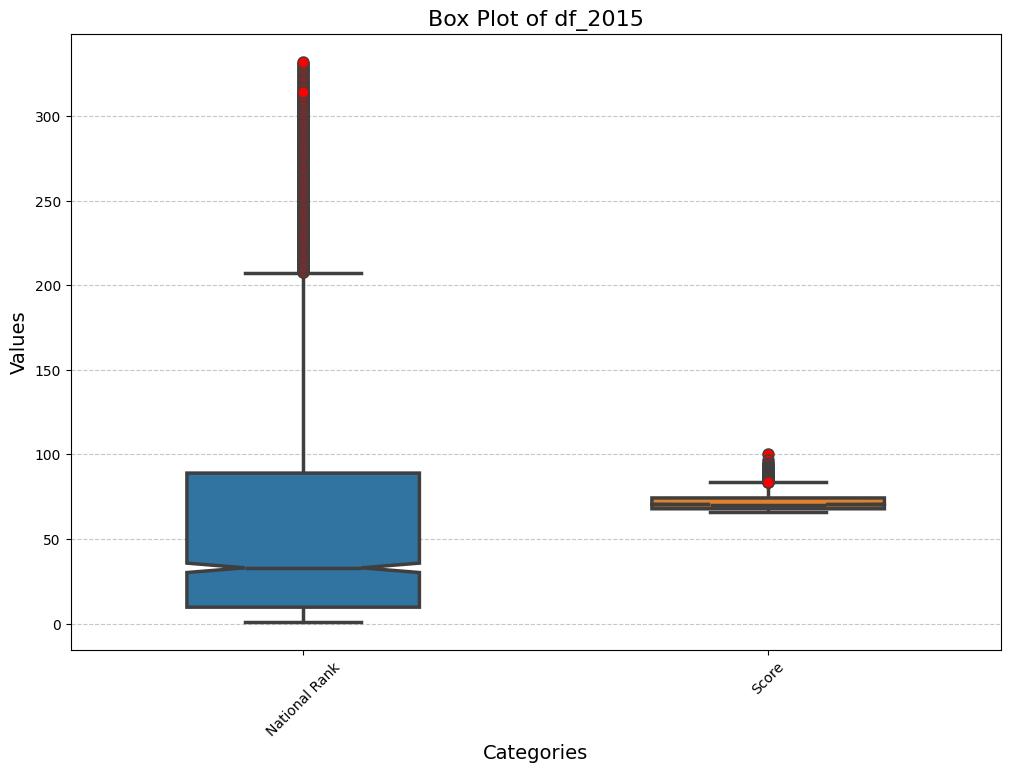

In [33]:
# Box plot

columns_df_2016 = ['National Rank', 'Score']
plt.figure(figsize=(12, 8))
# Display notches around the median & Customize the appearance of outliers
sns.boxplot(data= df_WRU_Relevent[columns_df_2016], width=0.5, linewidth=2.5, notch=True, flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.title('Box Plot of df_2015', fontsize=16)  # Set the title of the plot
plt.xlabel('Categories', fontsize=14)           # Set the label for the x-axis
plt.ylabel('Values', fontsize=14)               # Set the label for the y-axis
plt.xticks(rotation=45)                          # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)    # Add a grid for the y-axis
plt.show()                                       # Display the plot


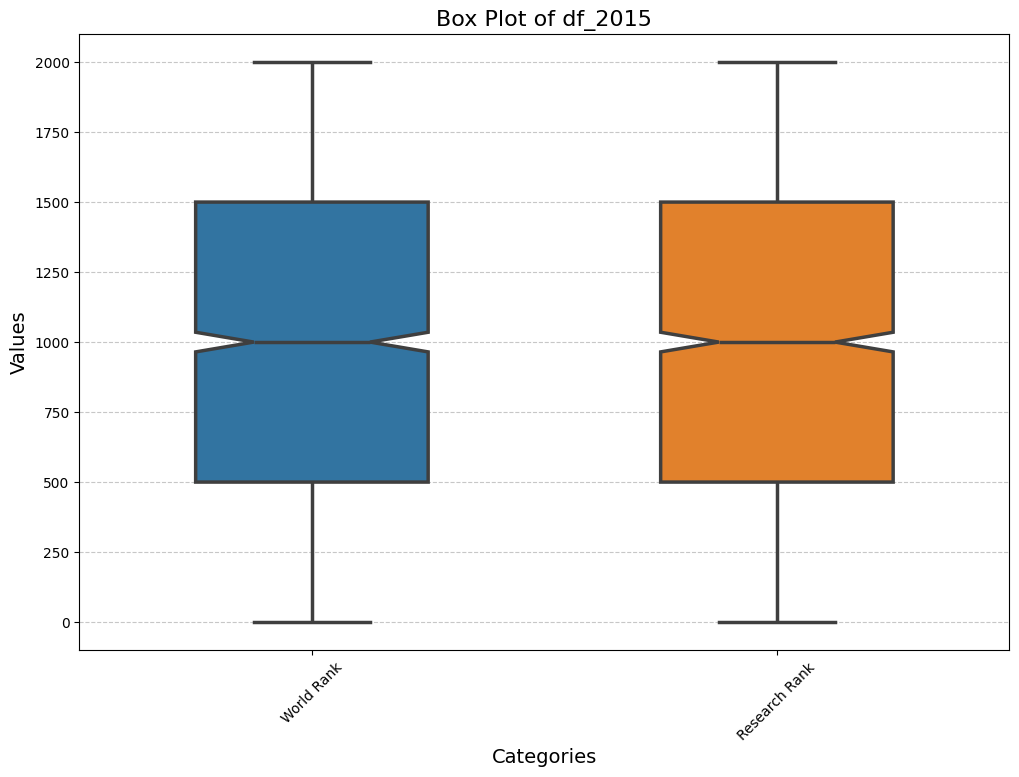

In [34]:
# Box plot

columns_df_2016 = ['World Rank', 'Research Rank']
plt.figure(figsize=(12, 8))
# Display notches around the median & Customize the appearance of outliers
sns.boxplot(data= df_WRU_Relevent[columns_df_2016], width=0.5, linewidth=2.5, notch=True, flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))
plt.title('Box Plot of df_2015', fontsize=16)  # Set the title of the plot
plt.xlabel('Categories', fontsize=14)           # Set the label for the x-axis
plt.ylabel('Values', fontsize=14)               # Set the label for the y-axis
plt.xticks(rotation=45)                          # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)    # Add a grid for the y-axis
plt.show()                                       # Display the plot


##### a. Which universities are ranked in the top 10 globally?

In [35]:

top_10_universities = df_WRU_Relevent.head(10)
top_10_universities = top_10_universities.sort_values(by='World Rank', ascending=False)

# World Rankings
fig_world_rank = px.bar(top_10_universities, x='World Rank', y='University Names', orientation='h',
                        labels={'University Names': 'University', 'World Rank': 'World Ranking'},
                        title='World Rankings of Top 10 Universities Globally')
fig_world_rank.update_layout(xaxis=dict(range=[0, 11]))  # Set a fixed range for the x-axis

# National Rankings
fig_national_rank = px.bar(top_10_universities, x='National Rank', y='University Names', orientation='h',
                           labels={'University Names': 'University', 'National Rank': 'National Ranking'},
                           title='National Rankings of Top 10 Universities Within Their Respective Countries')
fig_national_rank.update_layout(xaxis=dict(range=[0, 11]))  # Set a fixed range for the x-axis

fig_world_rank.show()
fig_national_rank.show()

##### b. Which universities are ranked in the top 10 for employment outcomes?

In [36]:
# Sort the DataFrame by the "Employability Rank" column
df_WRU['Employability Rank'] = pd.to_numeric(df_WRU['Employability Rank'], errors='coerce')
df_sorted = df_WRU.sort_values(by='Employability Rank')

# Select the top 10 universities
top_10_employers = df_sorted.head(10)

top_10_employers['University Names'] = top_10_employers['University Names'].apply(lambda x: x.split('\n')[0])

top_10_employers = top_10_employers.sort_values(by='Employability Rank', ascending=False)

# Create the plot
fig = px.bar(top_10_employers, x='Employability Rank', y='University Names', orientation='h', 
             title='Top 10 Universities for Employability Outcomes', labels={'Employability Rank': 'Employability Rank', 'University Names': 'University'})

# Show the plot
fig.show()

C:\Users\Tariq Al-Qahtani\AppData\Local\Temp\ipykernel_25220\3229294076.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### c. What positions do universities in Saudi Arabia hold within the global rankings?

In [37]:
# in this ranking there are 16 Universities in Saudi Arabia. 245-1979

universities_in_saudi_arabia = df_WRU_Relevent[df_WRU_Relevent['Location'] == 'Saudi Arabia']
universities_in_saudi_arabia = universities_in_saudi_arabia.sort_values(by='World Rank', ascending=False)


fig = px.bar(universities_in_saudi_arabia, x='World Rank', y='University Names', orientation='h',
             labels={'University Names': 'University', 'World Rank': 'Global Ranking'},
             title='Global Rankings of Universities in Saudi Arabia')
fig.update_layout(xaxis=dict(range=[0, 2000]))  # Optional: Set a fixed range for the x-axis
fig.show()


##### d. Considering various factors such as employment rankings, research rankings, and others, which has the most significant  mpact on a university's overall ranking?

In [38]:
col = ['Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score', 'World Rank']

filtered_df = df_WRU[col].loc[(df_WRU != '-').all(axis=1)]
filtered_df['World Rank'] = filtered_df['World Rank'].apply(lambda x: int(x.split('T')[0]))

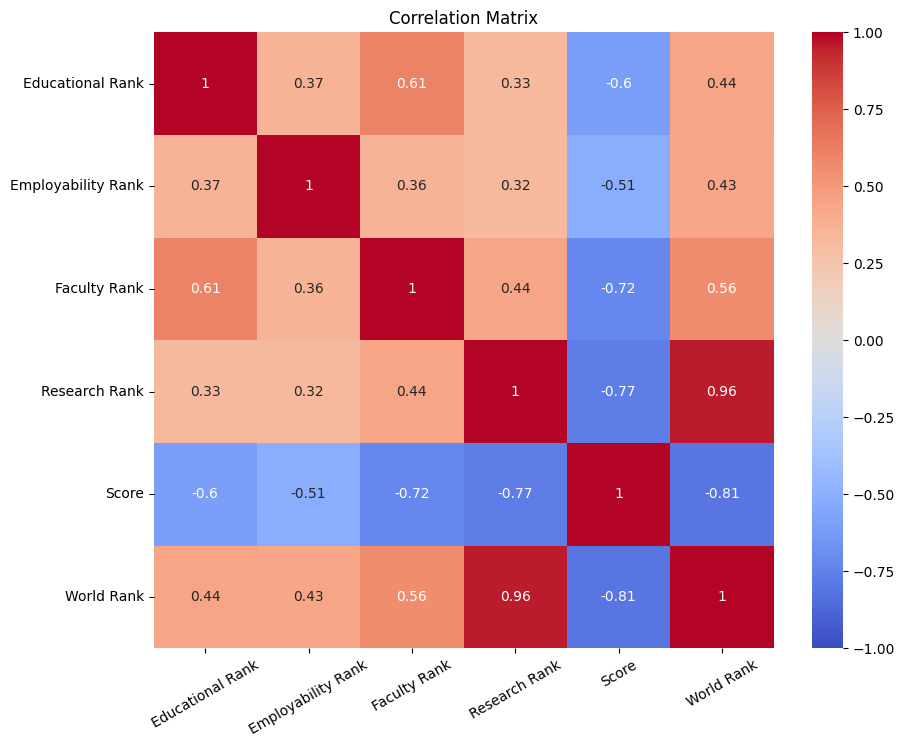

In [39]:
# Create a correlation matrix
corr_matrix = filtered_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Matrix')

# Display the plot
plt.xticks(rotation = 30)
plt.show()

##### e. Is there a correlation between national and global university rankings, and based on this information, can you recommend a country that appears to have a high concentration of top-ranked universities?

In [40]:
# Calculate the correlation coefficient
correlation = df_WRU_Relevent['National Rank'].corr(df_WRU_Relevent['World Rank'])

# Plotting
fig = px.scatter(df_WRU_Relevent, x='National Rank', y='World Rank', title=f'Correlation: {correlation}')
fig.show()

##### We can recommend a country that appears to have a high concentration of top-ranked universities by this calculation.

In [41]:
# Calculate the average global ranking for each country
average_ranking_by_country = df_WRU_Relevent.groupby('Location')['World Rank'].mean().sort_values()

# Recommend a country with a high concentration of top-ranked universities
recommended_country = average_ranking_by_country.idxmin()
print("Recommended country with a high concentration of top-ranked universities:", recommended_country)


Recommended country with a high concentration of top-ranked universities: Netherlands


##### which country has a high concentration of top-ranked universities based on their average world rank.

In [42]:
# Plotting
fig = px.bar(average_ranking_by_country, x=average_ranking_by_country.index, y=average_ranking_by_country.values,
             labels={'x': 'Country', 'y': 'Average World Rank'},
             title='Average World Ranking of Universities by Country')
fig.show()

##### Which countries have the highest number of universities among the top 100 universities in the world?

In [43]:
# Group the data by 'Location' and count the number of universities in each country
country_counts = df_WRU_Relevent.head(100).groupby('Location').size().reset_index(name='Count')

# Sort the data by 'Count' in descending order
country_counts_sorted = country_counts.sort_values('Count', ascending=False)

# Create a bar chart
fig = px.bar(country_counts_sorted, x='Location', y='Count',
             labels={'Location': 'Country', 'Count': 'Number of Universities'},
             title='Number of Top 100 Universities by Country')
fig.show()


# Seconde Data : Times Higher Education

### Data profiling

In [44]:
df_THE.head()

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_THE.isnull().sum().sort_values(ascending = False)

sdg-score-multi__number 7         1152
sdg-score-multi__value 7          1152
sdg-score-multi__value 8          1108
sdg-score-multi__number 8         1108
sdg-score-multi__value 6          1095
sdg-score-multi__number 6         1093
sdg-score-multi__value 5          1034
sdg-score-multi__number 5         1026
sdg-score-multi__value 3           786
sdg-score-multi__number 3          779
sdg-score-multi__value 2           766
sdg-score-multi__number 2          765
sdg-score-multi__number            724
sdg-score-multi__value             724
ranking-institution-title href      91
Location                            91
sdg-score-multi__value 4             8
scores                               0
University Name                      0
Rank                                 0
dtype: int64

In [46]:
df_THE.columns

Index(['Rank', 'University Name ', 'ranking-institution-title href',
       'Location', 'sdg-score-multi__number', 'sdg-score-multi__value',
       'sdg-score-multi__number 2', 'sdg-score-multi__value 2',
       'sdg-score-multi__number 3', 'sdg-score-multi__value 3',
       'sdg-score-multi__value 4', 'scores', 'sdg-score-multi__number 5',
       'sdg-score-multi__value 5', 'sdg-score-multi__number 6',
       'sdg-score-multi__value 6', 'sdg-score-multi__number 7',
       'sdg-score-multi__value 7', 'sdg-score-multi__number 8',
       'sdg-score-multi__value 8'],
      dtype='object')

In [47]:
df_THE.shape

(1591, 20)

### Data Quality Checks 

  ##### 1 -**Reliability**
  ##### 2- **Timeliness**
  ##### 3- **Consistency**

#### 4- **Relevance**

In [48]:
columns_to_drop = ['ranking-institution-title href', 'sdg-score-multi__number',
                   'sdg-score-multi__value', 'sdg-score-multi__number', 'sdg-score-multi__number 2',
                  'sdg-score-multi__value 2', 'sdg-score-multi__number 3', 'sdg-score-multi__value 3', 
                  'sdg-score-multi__number 5', 'sdg-score-multi__value 5', 'sdg-score-multi__number 6',
                  'sdg-score-multi__value 6', 'sdg-score-multi__number 7', 'sdg-score-multi__value 7', 
                  'sdg-score-multi__number 8', 'sdg-score-multi__value 8']

# Drop the specified columns
df_THE.drop(columns=columns_to_drop, inplace=True)

In [49]:
df_THE.columns

Index(['Rank', 'University Name ', 'Location', 'sdg-score-multi__value 4',
       'scores'],
      dtype='object')

##### 5- **Uniqueness**

In [50]:
df_THE.duplicated().sum()

0

##### 6- **Completeness**

In [51]:
df_THE.isnull().sum().sort_values(ascending = False)

Location                    91
sdg-score-multi__value 4     8
Rank                         0
University Name              0
scores                       0
dtype: int64

 ##### 7- **Check Accuracy**

In [52]:
df_THE.head(2)

,Rank,University Name,Location,sdg-score-multi__value 4,scores
0,1,Western Sydney University,Australia,98.8,99.4
1,2,University of Manchester,United Kingdom,94.8,97.5


In [53]:
df_THE.dtypes

Rank                        object
University Name             object
Location                    object
sdg-score-multi__value 4    object
scores                      object
dtype: object

###  Data Cleaning


In [54]:
df_THE.isnull().sum().sort_values(ascending = False)

Location                    91
sdg-score-multi__value 4     8
Rank                         0
University Name              0
scores                       0
dtype: int64

In [55]:
non_Location = df_THE[df_THE['Location'].isnull()]
non_Location

,Rank,University Name,Location,sdg-score-multi__value 4,scores
248,201–300,Kazan Federal University,NaN,NaN,76.8–82.1
276,201–300,Peter the Great St Petersburg Polytechnic Univ...,NaN,75.6–81.7,76.8–82.1
285,201–300,RUDN University,NaN,53.4–61.0,76.8–82.1
303,301–400,Altai State University,NaN,NaN,72.7–76.7
310,301–400,Bauman Moscow State Technical University,NaN,61.1–70.5,72.7–76.7
...,...,...,...,...,...
1545,1001+,Ural State Medical University,NaN,22.1–34.3,7.9–53.8
1560,1001+,V.I. Vernadsky Crimean Federal University (Ver...,NaN,1.5–45.2,7.9–53.8
1562,1001+,Volgograd State Technical University,NaN,1.5–45.2,7.9–53.8
1563,1001+,Voronezh State Technical University,NaN,49.5–54.4,7.9–53.8


In [56]:
uni_names = list(non_Location['University Name '])            # Store the university name in a list to search the locations.

universities_with_locations = {
    'Kazan Federal University': 'Russia',
    'Peter the Great St Petersburg Polytechnic University': 'Russia',
    'RUDN University': 'Russia',
    'Altai State University': 'Russia',
    'Bauman Moscow State Technical University': 'Russia',
    'Irkutsk National Research Technical University': 'Russia',
    'National Research Nuclear University MEPhI': 'Russia',
    'Financial University under the Government of the Russian Federation': 'Russia',
    'Immanuel Kant Baltic Federal University': 'Russia',
    'ITMO University': 'Russia',
    'Kursk State Medical University': 'Russia',
    'Moscow Institute of Physics and Technology (MIPT)': 'Russia',
    'Russian Biotechnological University (BIOTECH)': 'Russia',
    'Plekhanov Russian University of Economics': 'Russia',
    'Siberian Federal University': 'Russia',
    'Industrial University of Tyumen': 'Russia',
    'North-Caucasus Federal University': 'Russia',
    'North-Eastern Federal University': 'Russia',
    'Novosibirsk State Agrarian University': 'Russia',
    'Perm State University': 'Russia',
    'Russian State Agrarian University' : 'Russia',
    'Moscow Timiryazev Agricultural Academy': 'Russia',
    'Southern Federal University': 'Russia',
    'South Ural State University': 'Russia',
    'Tomsk Polytechnic University': 'Russia',
    'Volgograd State University': 'Russia',
    'Bashkir State University': 'Russia',
    'Bashkir State Medical University': 'Russia',
    'Belgorod State National Research University': 'Russia',
    'Lobachevsky State University of Nizhni Novgorod': 'Russia',
    'Novosibirsk State Technical University': 'Russia',
    'Perm National Research Polytechnic University': 'Russia',
    'Rostov State University of Economics': 'Russia',
    'Ryazan State Medical University': 'Russia',
    'Samara National Research University (Samara University)': 'Russia',
    'Samara State Medical University': 'Russia',
    'Samara State Technical University': 'Russia',
    'Siberian State Medical University': 'Russia',
    'St Petersburg Electrotechnical University (LETI)': 'Russia',
    'Tomsk State University of Control Systems and Radioelectronics': 'Russia',
    'Tver State Technical University': 'Russia',
    'Ufa State Petroleum Technological University': 'Russia',
    'Voronezh State University': 'Russia',
    'Belarusian State University of Informatics and Radioelectronics': 'Belarus',
    'University of Civil Protection': 'Russia',
    'Don State Technical University': 'Russia',
    'Dostoevsky Omsk State University': 'Russia',
    'Gomel State Medical University': 'Belarus',
    'Gubkin Russian State University of Oil and Gas': 'Russia',
    'Irkutsk State University': 'Russia',
    'Russian State University for the Humanities' : 'Russia',
    'Ivanovo State University': 'Russia',
    'Kabardino-Balkarian State University': 'Russia',
    'Kazan National Research Technical University': 'Russia',
    'Kazan National Research Technological University': 'Russia',
    'Kazan State Medical University': 'Russia',
    'Kemerovo State University': 'Russia',
    'Kuban State Technological University': 'Russia',
    'MIREA - Russian Technological University': 'Russia',
    'Moscow Pedagogical State University': 'Russia',
    'Moscow Power Engineering Institute': 'Russia',
    'Moscow State University of Design and Technology': 'Russia',
    'Moscow Technical University of Communications and Informatics': 'Russia',
    'National Research Saratov State University': 'Russia',
    'Nizhny Novgorod State Technical University': 'Russia',
    'Novosibirsk State University of Economics and Management': 'Russia',
    'Omsk State Agrarian University': 'Russia',
    'Omsk State Technical University': 'Russia',
    'Orel State University named after I.S. Turgenev': 'Russia',
    'Pacific National University': 'Russia',
    'Pavlov First Saint Petersburg State Medical University': 'Russia',
    'Platov South-Russian State Polytechnic University (NPI)': 'Russia',
    'Privolzhsky Research Medical University': 'Russia',
    'Pskov State University': 'Russia',
    'Russian Presidential Academy of National Economy and Public Administration': 'Russia',
    'Russian State Agrarian University – Moscow Timiryazev Agricultural Academy': 'Russia',
    'Saint Petersburg State Pediatric Medical University': 'Russia',
    'Samara State University of Economics': 'Russia',
    'State University of Land Use Planning': 'Russia',
    'Stavropol State Agrarian University': 'Russia',
    'Tambov State Technical University': 'Russia',
    'Togliatti State University': 'Russia',
    'Tomsk State Pedagogical University': 'Russia',
    'Tula State University': 'Russia',
    'Tver State University': 'Russia',
    'University of Tyumen': 'Russia',
    'Ulyanovsk State Technical University': 'Russia',
    'Ural State University of Economics': 'Russia',
    'Ural State Medical University': 'Russia',
    'V.I. Vernadsky Crimean Federal University (Vernadsky CFU)': 'Russia',
    'Volgograd State Technical University': 'Russia',
    'Voronezh State Technical University': 'Russia',
    'Yanka Kupala State University of Grodno': 'Belarus'
}


df_THE.loc[df_THE['University Name '].isin(universities_with_locations.keys()), 'Location'] = df_THE['University Name '].map(universities_with_locations)

In [57]:
df_THE['Location'].isnull().sum()

0

In [58]:
df_THE.isnull().sum().sort_values(ascending = False)

sdg-score-multi__value 4    8
Rank                        0
University Name             0
Location                    0
scores                      0
dtype: int64

In [59]:
def extract_number(value):
    if isinstance(value, str) and '–' in value:  # Check if the value is a string and contains a dash
        return float(value.split('–')[1])  # Split and extract the number after the dash
    elif isinstance(value, float):  # Check if the value is already a float
        return value
    else:
        return value  # Return the original value if it doesn't contain a dash or if it's not a string

# Apply the function to the column
df_THE['new sdg-4'] = df_THE['sdg-score-multi__value 4'].apply(extract_number)

# Display the updated DataFrame
print(df_THE['new sdg-4'])

0       98.8
1       94.8
2       92.6
3       97.8
4       96.3
        ... 
1586    45.2
1587    53.3
1588    45.2
1589    45.2
1590    45.2
Name: new sdg-4, Length: 1591, dtype: object


In [60]:
def extract_number(score):
    if '–' in score:  # Check if it's a range
        return float(score.split('–')[1])  # Extract the second number in the range
    else:
        return float(score)

# Apply the function to the entire 'scores' column
df_THE['New Score'] = df_THE['scores'].apply(lambda x: extract_number(x))

df_THE['New Score']

0       99.4
1       97.5
2       97.2
3       96.9
4       96.6
        ... 
1586    53.8
1587    53.8
1588    53.8
1589    53.8
1590    53.8
Name: New Score, Length: 1591, dtype: float64

In [61]:
df_THE['new sdg-4'] = df_THE['new sdg-4'].fillna(df_THE['New Score'])

In [62]:
df_THE.isnull().sum().sort_values(ascending = False)

sdg-score-multi__value 4    8
Rank                        0
University Name             0
Location                    0
scores                      0
new sdg-4                   0
New Score                   0
dtype: int64

In [63]:
df_THE['Rank'].unique()

array(['1', '2', '3', '4', '5', '6', '=7', '=9', '12', '13', '=14', '17',
       '=18', '20', '21', '22', '23', '=24', '=26', '28', '=29', '32',
       '33', '=34', '=36', '38', '39', '=40', '=42', '=46', '=49', '=52',
       '55', '56', '57', '=58', '=61', '63', '=64', '66', '=67', '69',
       '70', '71', '=72', '=74', '=77', '=79', '=83', '85', '=86', '91',
       '=92', '96', '=97', '99', '=100', '101–200', '201–300', '301–400',
       '401–600', '601–800', '801–1000', '1001+'], dtype=object)

In [64]:
df_THE['Rank'] = df_THE['Rank'].str.replace('=', '')


In [65]:
df_THE['Rank'] = df_THE['Rank'].str.replace('+', '')


In [66]:
df_THE['New_Rank'] = df_THE['Rank'].apply(lambda x: (x.split('–')[0]))


In [67]:
df_THE['New_Rank'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '9', '12', '13', '14', '17',
       '18', '20', '21', '22', '23', '24', '26', '28', '29', '32', '33',
       '34', '36', '38', '39', '40', '42', '46', '49', '52', '55', '56',
       '57', '58', '61', '63', '64', '66', '67', '69', '70', '71', '72',
       '74', '77', '79', '83', '85', '86', '91', '92', '96', '97', '99',
       '100', '101', '201', '301', '401', '601', '801', '1001'],
      dtype=object)

In [68]:
df_THE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      1591 non-null   object 
 1   University Name           1591 non-null   object 
 2   Location                  1591 non-null   object 
 3   sdg-score-multi__value 4  1583 non-null   object 
 4   scores                    1591 non-null   object 
 5   new sdg-4                 1591 non-null   object 
 6   New Score                 1591 non-null   float64
 7   New_Rank                  1591 non-null   object 
dtypes: float64(1), object(7)
memory usage: 99.6+ KB


In [69]:
df_THE.head(2)

,Rank,University Name,Location,sdg-score-multi__value 4,scores,new sdg-4,New Score,New_Rank
0,1,Western Sydney University,Australia,98.8,99.4,98.8,99.4,1
1,2,University of Manchester,United Kingdom,94.8,97.5,94.8,97.5,2


In [70]:
df_THE.dtypes

Rank                         object
University Name              object
Location                     object
sdg-score-multi__value 4     object
scores                       object
new sdg-4                    object
New Score                   float64
New_Rank                     object
dtype: object

 ### Visulaization

In [111]:
top_10 = df_THE.head(10)

# World Rankings
fig_world_Top = px.bar(top_10, x='New_Rank', y='University Name ', orientation='h',
                        labels={'University Name ': 'University', 'New_Rank': 'Ranking'},
                        title='Rankings of Top 10 Universities Globally')
fig_world_Top.update_layout(xaxis=dict(range=[0, 11]))  # Set a fixed range for the x-axis
fig_world_Top.show()

In [72]:
top_10 = df_THE.head(10)


fig_world = px.bar(top_10, x='New_Rank', y='University Name ', orientation='h',
                        labels={'University Name ': 'University', 'New_Rank': 'Ranking'},
                        title='Rankings of Top 10 Universities Globally')
fig_world.update_layout(xaxis=dict(range=[0, 11]))  # Set a fixed range for the x-axis
fig_world.show()

In [73]:
universities_in_saudi_arabia2 = df_THE[df_THE['Location'] == 'Saudi Arabia']

fig = px.bar(universities_in_saudi_arabia2, x='New_Rank', y='University Name ', orientation='h',
             labels={'University Names': 'University', 'New_Rank': 'Global Ranking'},
             title='Global Rankings of Universities in Saudi Arabia')
#fig.update_layout(xaxis=dict(range=[0, 10]))  # Optional: Set a fixed range for the x-axis
fig.show()

In [74]:
# Calculate the correlation coefficient
df_THE['new sdg-4'] = pd.to_numeric(df_THE['new sdg-4'], errors='coerce')

correlation = df_THE['New Score'].corr(df_THE['new sdg-4'])

# Plotting
fig = px.scatter(df_THE, x='New Score', y='new sdg-4', title=f'Correlation: {correlation}')
fig.update_yaxes(title='QUALITY OF EDUCATION Score')
fig.show()

In [112]:
# Group the data by 'Location' and count the number of universities in each country
country_counts = df_THE.head(100).groupby('Location').size().reset_index(name='Count')

# Sort the data by 'Count' in descending order
country_counts_sorted = country_counts.sort_values('Count', ascending=False)

# Create a bar chart
fig = px.bar(country_counts_sorted, x='Location', y='Count',
             labels={'Location': 'Country', 'Count': 'Number of Universities'},
             title='Number of Top 100 Universities by Country')
fig.show()

In [113]:
df_THE.columns

Index(['Rank', 'University Name ', 'Location', 'sdg-score-multi__value 4',
       'scores', 'new sdg-4', 'New Score', 'New_Rank'],
      dtype='object')

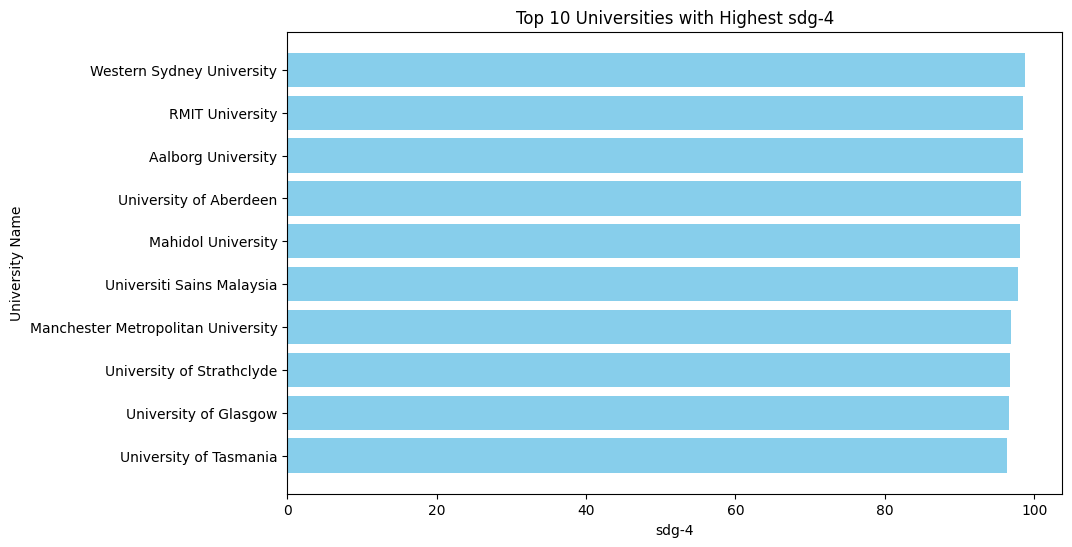

In [114]:
df_THE['new sdg-4'] = pd.to_numeric(df_THE['new sdg-4'], errors='coerce')

# Sort the DataFrame by 'new sdg-4' column in descending order
sorted_df = df_THE.sort_values(by='new sdg-4', ascending=False)

# Get top 10 universities with highest values in 'new sdg-4' column
top_universities = sorted_df.head(10)  # No need to select specific columns here

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(top_universities['University Name '], top_universities['new sdg-4'], color='skyblue')
plt.xlabel('sdg-4')
plt.ylabel('University Name')
plt.title('Top 10 Universities with Highest sdg-4')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest values at the top
plt.show()

# Third Data : shanghai Ranking

Shanghai Ranking Academic Ranking (ARWU): "Ranking System Info based on" :

- University that has any Nobel Laureates(winners), Fields Medalists, Highly Cited Researchers, or Papers published in Nature, or Science, and the per capita academic performance of an institution.

### Data profiling

  ##### 1 -**Reliability**
  ##### 2- **Timeliness**
  ##### 3- **Consistency**
  ##### 4- **Relevance**

In [115]:
df_SR.head()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...


In [116]:
df_SR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ranking                 1000 non-null   object 
 1   University Name         1000 non-null   object 
 2   National/Regional Rank  1000 non-null   object 
 3   Total Score             1000 non-null   float64
 4   LOGO                    1000 non-null   object 
 5   University Detail       1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [117]:
df_SR.isnull().sum().sort_values(ascending = False)


Ranking                   0
University Name           0
National/Regional Rank    0
Total Score               0
LOGO                      0
University Detail         0
dtype: int64

In [118]:
df_SR.columns

Index(['Ranking', 'University Name', 'National/Regional Rank', 'Total Score',
       'LOGO', 'University Detail '],
      dtype='object')

In [119]:
df_SR.shape

(1000, 6)

##### 5- **Uniqueness**

In [120]:
df_SR.duplicated().sum()

0

##### 6- **Completeness**

In [121]:
df_SR.isnull().sum().sort_values(ascending = False)


Ranking                   0
University Name           0
National/Regional Rank    0
Total Score               0
LOGO                      0
University Detail         0
dtype: int64

##### 7- **Check Accuracy**

In [122]:
df_SR.head(2)

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...


In [123]:
df_SR.dtypes

Ranking                    object
University Name            object
National/Regional Rank     object
Total Score               float64
LOGO                       object
University Detail          object
dtype: object

In [124]:
# Created new dataframe with these columns: 'Ranking', 'University Name', 'National/Regional Rank', 'Total Score'

df_SR_choosen_col = df_SR[['Ranking', 'University Name', 'National/Regional Rank', 'Total Score']]

In [88]:
#  Becasue we have dash " - " in Ranking column  

df_SR_choosen_col['New_Rank'] = df_SR_choosen_col['Ranking'].apply(lambda x : int(x.split('-')[0]))

C:\Users\Tariq Al-Qahtani\AppData\Local\Temp\ipykernel_25220\2663743202.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
# we dropped Ranking column because we already has the same values in: New_Rank

df_SR_choosen_col.drop(columns=['Ranking'], inplace=True)

C:\Users\Tariq Al-Qahtani\AppData\Local\Temp\ipykernel_25220\3861517919.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Ranking System:  To Verify use these codes below :

- first 100 Universities are ranked indiviually from 1 - 100

        # Code: df_SR_choosen_col[['Ranking','Total Score', 'New_Rank']][0:100]

# The rest of universities are ranked in group category: 


- From 101 - 150 universities in the World will fall under 101 group category. 

        # Code: df_SR_choosen_col[['Ranking','Total Score', 'New_Rank']][100:150]

- 151 - 200 universities in World ranking will fall under 151 group category.

        # code: df_SR_choosen_col[['Ranking','Total Score', 'New_Rank']][150:200]

- 201 - 300 universities in World ranking will fall under 201 group category.

        # code: df_SR_choosen_col[['Ranking','Total Score', 'New_Rank']][200:299]
        

- 301 - 400 universities in World ranking will fall under 301 group category.
- 401 - 500 universities in World ranking will fall under 401 group category.

- 501 - 600 universities in World ranking will fall under 501 group category.
- 601 - 700 universities in World ranking will fall under 601 group category.

- 701 - 800 universities in World ranking will fall under 701 group category.
- 801 - 900 universities in World ranking will fall under 801 group category.

- 901 - 1000 universities in World ranking will fall under 901 group category.

In [90]:
# Created new column for National/regional Rank  Becasue the original one has dash ('-') in column.

df_SR_choosen_col['New_National/Regional Rank'] = df_SR_choosen_col['National/Regional Rank'].apply(lambda x : int(x.split('-')[0]))

C:\Users\Tariq Al-Qahtani\AppData\Local\Temp\ipykernel_25220\355499910.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
# Dropped the old one to make it clear and orgranzied 

df_SR_choosen_col.drop(columns=['National/Regional Rank'], inplace=True)

C:\Users\Tariq Al-Qahtani\AppData\Local\Temp\ipykernel_25220\2730236465.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



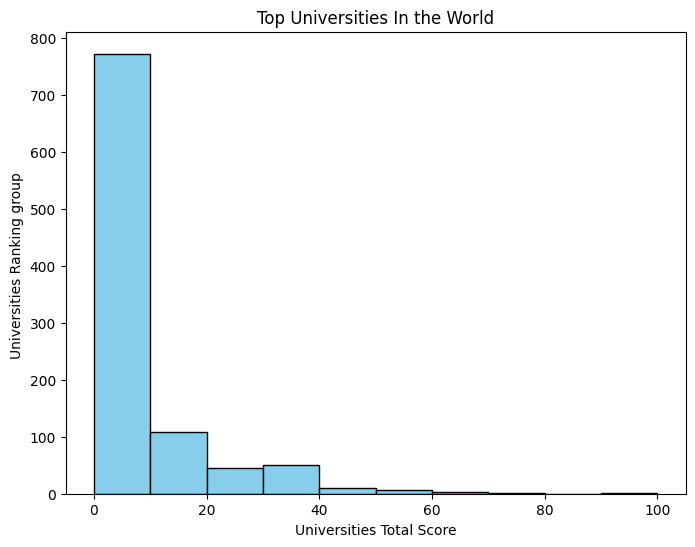

In [92]:
# To see Total Score of Universities

plt.figure(figsize=(8, 6))
plt.hist(df_SR_choosen_col['Total Score'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Universities Total Score')
plt.ylabel('Universities Ranking group ')
plt.title('Top Universities In the World')
plt.show()

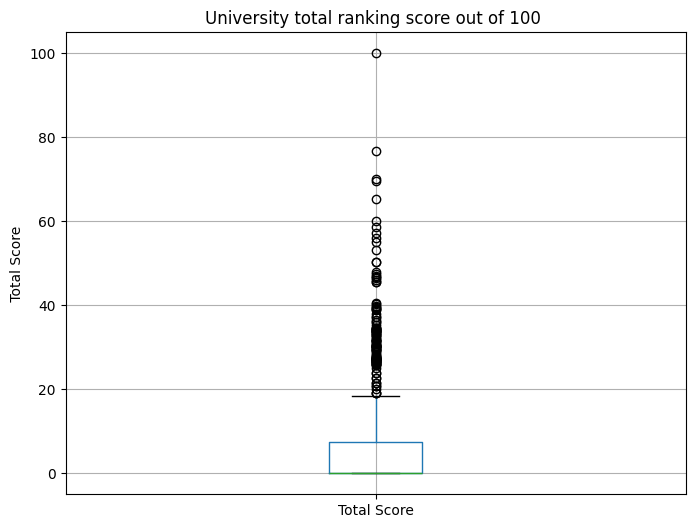

In [93]:
# To look for an outliers in total scores

plt.figure(figsize=(8, 6))
df_SR_choosen_col.boxplot(column=['Total Score'])
plt.title('University total ranking score out of 100 ')
plt.ylabel(' Total Score ')
plt.show()

In [94]:
# To see the mean of Universities total score:

df_SR_choosen_col['Total Score'].mean()

5.9435

# check the code below::

In [95]:
# You will find that "first quartile & second quartile" is equal to zero
# The reason Q1 & Q2 has  '' 0 Value '' because Some universities has  total score of Zero ' 0 '




q1 = df_SR_choosen_col['Total Score'].quantile(0.25)

# Calculate the second quartile (median or 50th percentile)
q2 = df_SR_choosen_col['Total Score'].quantile(0.5)

# Calculate the third quartile (75th percentile)
q3 = df_SR_choosen_col['Total Score'].quantile(0.75)

print("First Quartile (Q1):", q1)
print("Second Quartile (Q2 or Median):", q2)
print("Third Quartile (Q3):", q3)

First Quartile (Q1): 0.0
Second Quartile (Q2 or Median): 0.0
Third Quartile (Q3): 7.5


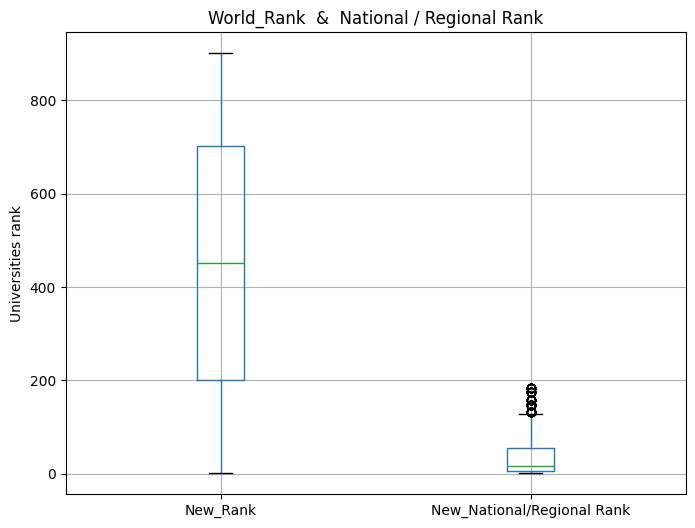

In [96]:
# Create a boxplot
plt.figure(figsize=(8, 6))
df_SR_choosen_col.boxplot(column=['New_Rank', 'New_National/Regional Rank'])
plt.title('World_Rank  &  National / Regional Rank')
plt.ylabel('Universities rank')
plt.show()

In [97]:

# TO see the mean of World Rank

df_SR_choosen_col['New_Rank'].mean()

458.429

# The mean of World rank is: 458.429

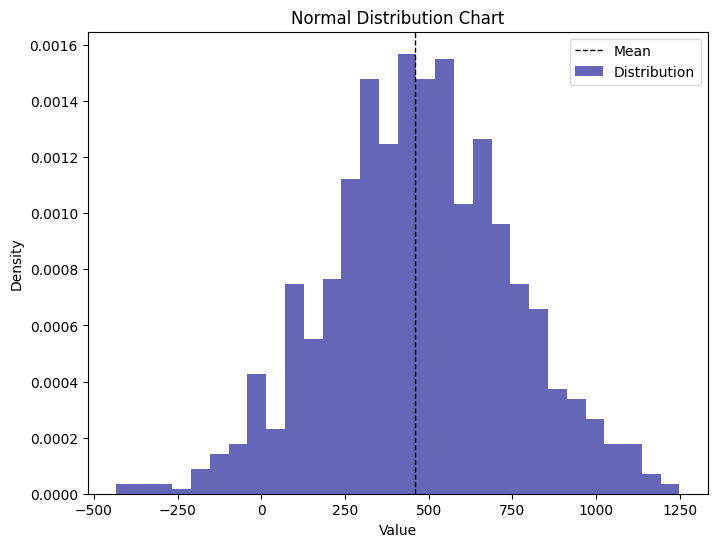

In [98]:
# To find the mean and standard deviation of the column

column_data = df_SR_choosen_col['New_Rank']

mean = df_SR_choosen_col['New_Rank'].mean()
std_dev = df_SR_choosen_col['New_Rank'].std()

# To Generate random samples from a normal distribution with the calculated mean and standard deviation
samples = np.random.normal(mean, std_dev, size=len(column_data))

#normal distribution chart
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='darkblue')

# Adding a vertical line for the mean
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)

plt.title('Normal Distribution Chart')
plt.xlabel('Value')
plt.ylabel('Density')

# Adding a legend
plt.legend(['Mean', 'Distribution'])

# Show plot
plt.show()


# Big percentage of Universities falls under this Universities range ranking: (200)-(600) because of the per capita academic performance of an institution or 
# the Nobel Laureates(winners), Fields Medalists, Highly Cited Researchers, and Papers published in Nature, or Science fields

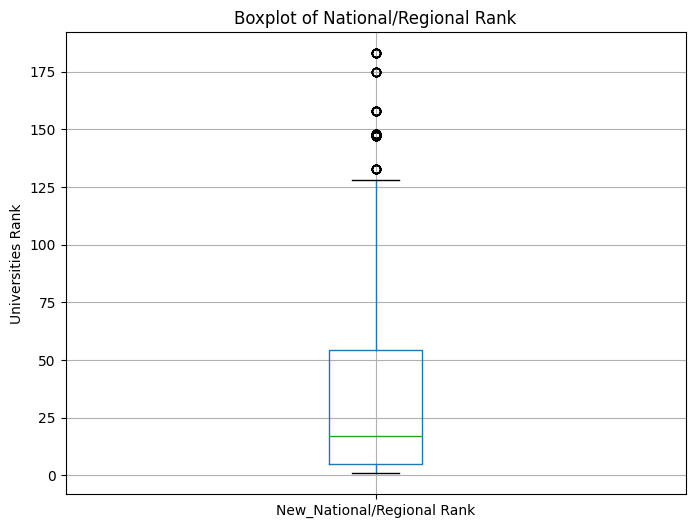

In [99]:
# To see the outliers for National/Regional Rank score
plt.figure(figsize=(8, 6))
df_SR_choosen_col.boxplot(column=['New_National/Regional Rank'])
plt.title('Boxplot of National/Regional Rank')
plt.ylabel('Universities Rank')
plt.show()

In [100]:
# Mean Because of the outliers 

df_SR_choosen_col['New_National/Regional Rank'].mean()

38.244

# mean of National/Regional Rank is:  38.244

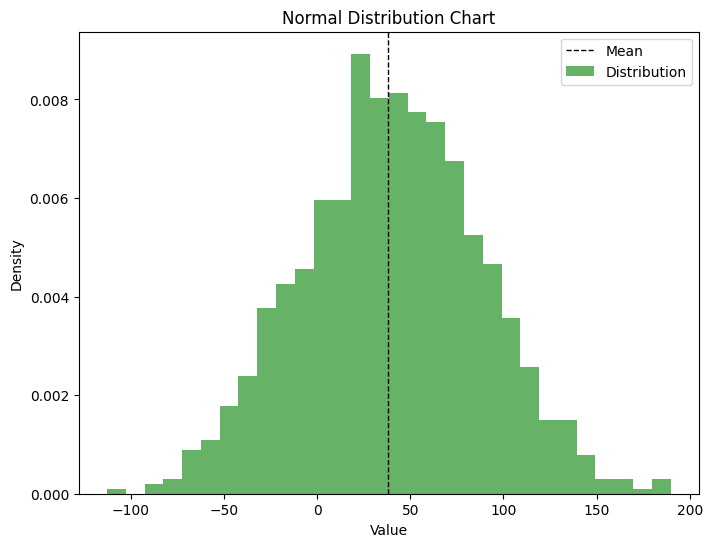

In [101]:
# To see if the data is normally distributed for National Rank

column_data = df_SR_choosen_col['New_National/Regional Rank']

# To find the mean and standard deviation
mean = df_SR_choosen_col['New_National/Regional Rank'].mean()
std_dev = df_SR_choosen_col['New_National/Regional Rank'].std()

# To Generate random samples from a normal distribution with the calculated mean and standard deviation
samples = np.random.normal(mean, std_dev, size=len(column_data))

#normal distribution chart
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# Adding a vertical line for the mean
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)


plt.title('Normal Distribution Chart')
plt.xlabel('Value')
plt.ylabel('Density')

# Adding a legend
plt.legend(['Mean', 'Distribution'])

# Show plot
plt.show()


# high number of National/Regional Universities were giving a rank of zero. Because they dont have any of these : Nobel Laureates(winners), Fields Medalists, Highly Cited Researchers, or Papers published in Nature, or Science, and the per capita academic performance of an institution.



In [102]:
Uni_group_RK_all = df_SR_choosen_col[['University Name','Total Score', 'New_Rank','New_National/Regional Rank']]

Uni_group_RK_all

,University Name,Total Score,New_Rank,New_National/Regional Rank
0,Harvard University,100.0,1,1
1,Stanford University,76.8,2,2
2,Massachusetts Institute of Technology (MIT),70.1,3,3
3,University of Cambridge,69.6,4,1
4,"University of California, Berkeley",65.3,5,4
...,...,...,...,...
995,University of Wuppertal,0.0,901,46
996,Warsaw University of Technology,0.0,901,7
997,Western Norway University of Applied Sciences,0.0,901,6
998,Wroclaw University of Science and Technology,0.0,901,7


# Is there a correlation between national and global university rankings?

 - there is a small positive correlation between national and global Universities

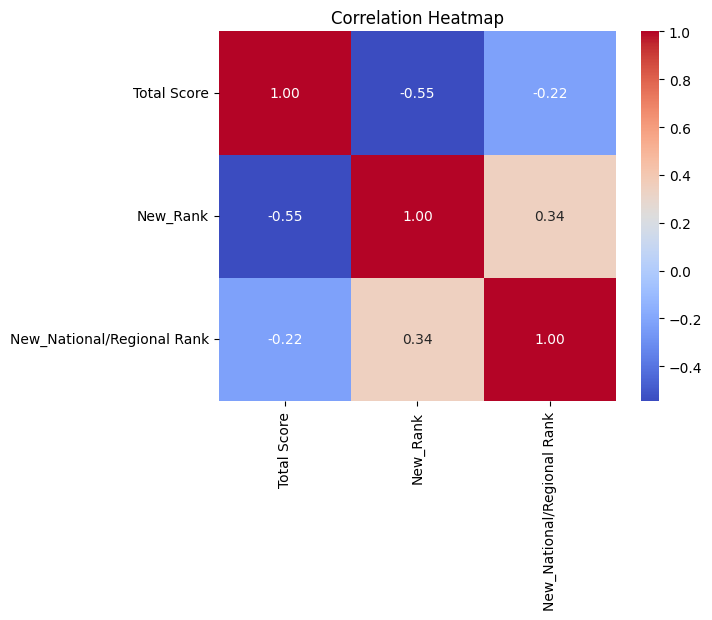

In [103]:
selected_columns = Uni_group_RK_all[['Total Score', 'New_Rank','New_National/Regional Rank']]

correlation_matrix = selected_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


plt.title('Correlation Heatmap')

# Show plot
plt.show()

In [104]:
Uni_group_World_RK_10 = Uni_group_RK_all[['University Name','Total Score', 'New_Rank']][0:10]
Uni_group_World_RK_10

,University Name,Total Score,New_Rank
0,Harvard University,100.0,1
1,Stanford University,76.8,2
2,Massachusetts Institute of Technology (MIT),70.1,3
3,University of Cambridge,69.6,4
4,"University of California, Berkeley",65.3,5
5,Princeton University,60.0,6
6,University of Oxford,58.7,7
7,Columbia University,57.2,8
8,California Institute of Technology,56.1,9
9,University of Chicago,55.1,10


# Which universities are ranked in the top 10 globally?


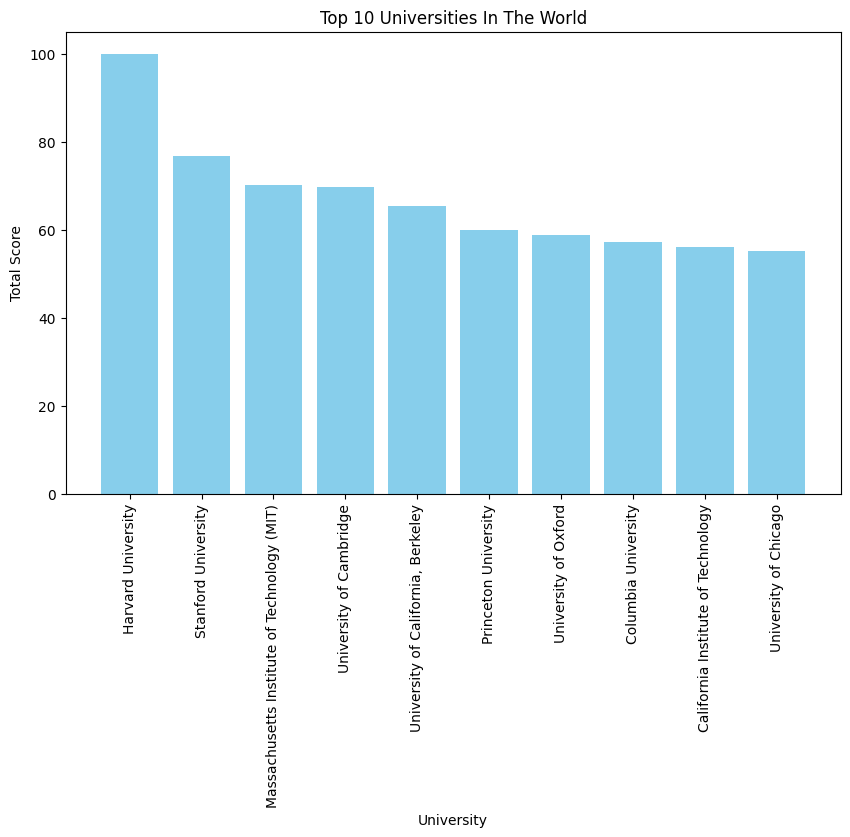

In [105]:
# To show the top 10 universities in the world

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(Uni_group_World_RK_10['University Name'], Uni_group_World_RK_10['Total Score'], color='skyblue')

# Adding title and labels
plt.title('Top 10 Universities In The World')
plt.xlabel('University')
plt.ylabel('Total Score')

# Rotating x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Show plot
plt.show()

In [106]:
Uni_group_World_National_RK = Uni_group_RK_all[['University Name','Total Score','New_National/Regional Rank']][0:10]
Uni_group_World_National_RK

,University Name,Total Score,New_National/Regional Rank
0,Harvard University,100.0,1
1,Stanford University,76.8,2
2,Massachusetts Institute of Technology (MIT),70.1,3
3,University of Cambridge,69.6,1
4,"University of California, Berkeley",65.3,4
5,Princeton University,60.0,5
6,University of Oxford,58.7,2
7,Columbia University,57.2,6
8,California Institute of Technology,56.1,7
9,University of Chicago,55.1,8


# What positions do universities in Saudi Arabia hold within the global rankings?

In [107]:
uni_names = [
    'King Abdullah University of Science and Technology',
    'King Abdulaziz University',
    'King Saud University',
    'King Fahd University of Petroleum & Minerals',
    'Taif University',
    'King Khalid University',
    'Prince Sattam Bin Abdulaziz University'
]

selected_rows = Uni_group_RK_all.loc[Uni_group_RK_all['University Name'].isin(uni_names)]

selected_rows

,University Name,Total Score,New_Rank,New_National/Regional Rank
109,King Abdulaziz University,0.0,101,1
110,King Saud University,0.0,101,1
222,King Abdullah University of Science and Techno...,0.0,201,3
423,King Fahd University of Petroleum & Minerals,0.0,401,4
446,Taif University,0.0,401,4
631,King Khalid University,0.0,601,6
855,Prince Sattam Bin Abdulaziz University,0.0,801,7


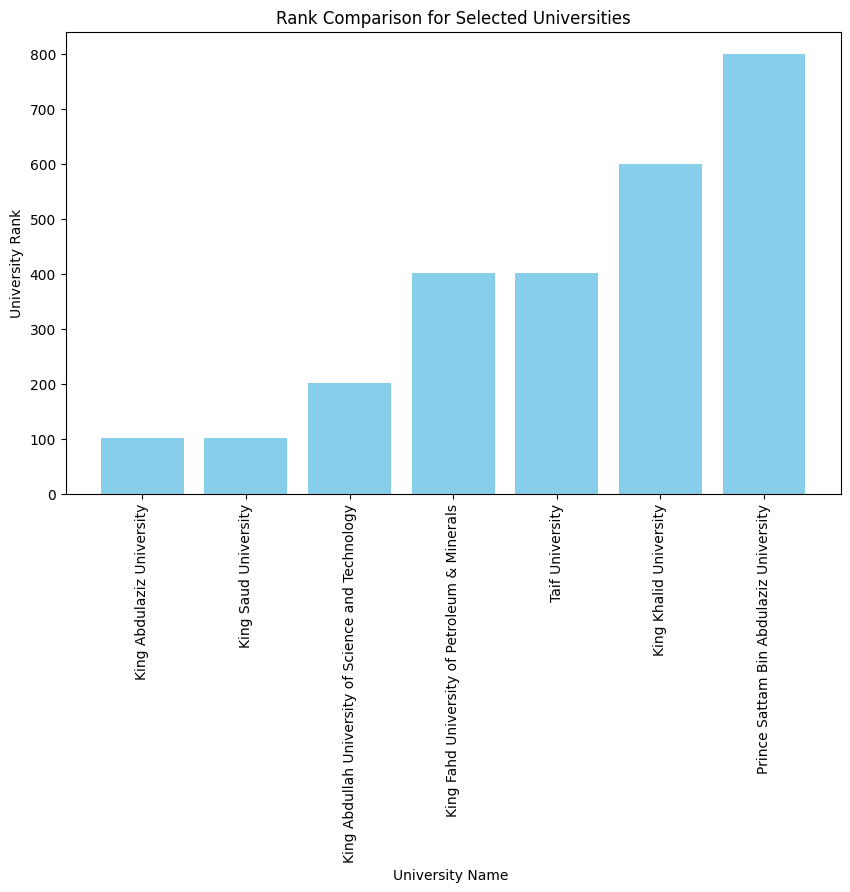

In [109]:
# To display the ranking of Saudi Universities in The World 


plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(selected_rows['University Name'], selected_rows['New_Rank'], color='skyblue')


plt.title('Rank Comparison for Selected Universities')
plt.xlabel('University Name ')
plt.ylabel('University Rank')


plt.xticks(rotation=90)

# Show plot

plt.show()